In [2]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
import warnings
warnings.simplefilter(action='ignore',category=np.VisibleDeprecationWarning)

In [3]:
#Manually compute the 55th Percentile 
x=make_array(43,20,51,7,28,34)

In [4]:
np.sort(x)

array([ 7, 20, 28, 34, 43, 51], dtype=int64)

In [5]:
np.arange(1,7)/len(x)

array([ 0.16666667,  0.33333333,  0.5       ,  0.66666667,  0.83333333,
        1.        ])

In [6]:
percentile(55,x)

34

In [7]:
s=[1,5,7,3,9]
percentile(10,s) == 0

False

In [8]:
percentile(39,s) ==percentile(40,s) 

True

In [9]:
percentile(40,s) ==percentile(41,s) 

False

In [10]:
percentile(50,s) ==5

True

## Total Compensation in the population

In [12]:
sf=Table.read_table('.csv/san_francisco_2019.csv')

In [13]:
sf.show(5)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Information Systems,IS Trainer-Journey,91332,0,40059,131391
Public Protection,Adult Probation,Information Systems,IS Engineer-Assistant,123241,0,49279,172520
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Senior,115715,0,46752,162468
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Principal,159394,0,57312,216706
Public Protection,Adult Probation,Information Systems,IS Programmer Analyst,70035,0,28671,98706


In [14]:
#who make the most money
sf.sort('Total Compensation',descending=True).show(3)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
General Administration & Finance,Retirement Services,Administrative & Mgmt (Unrep),Chief Investment Officer,577633,0,146398,724031
General Administration & Finance,Retirement Services,Unassigned,Managing Director,483072,0,134879,617951
General Administration & Finance,Retirement Services,Unassigned,Managing Director,482649,0,134905,617554


In [15]:
#who make the least money
sf.sort('Total Compensation',descending=False).show(3)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Probation & Parole,Deputy Probation Officer,0,0,0,0
Public Protection,Fire Department,"Clerical, Secretarial & Steno",Senior Clerk Typist,0,0,0,0
Public Protection,Juvenile Court,Correction & Detention,"Counselor, Juvenile Hall PERS",0,0,0,0


In [16]:
#we should distribute and see full time employees .
# 15/hr 20 hr/week , 50  weeks
min_salary=15*20*50


In [17]:
sf=sf.where('Salary',are.above(min_salary))

In [18]:
sf.show(3)

Organization Group,Department,Job Family,Job,Salary,Overtime,Benefits,Total Compensation
Public Protection,Adult Probation,Information Systems,IS Trainer-Journey,91332,0,40059,131391
Public Protection,Adult Probation,Information Systems,IS Engineer-Assistant,123241,0,49279,172520
Public Protection,Adult Probation,Information Systems,IS Business Analyst-Senior,115715,0,46752,162468


In [19]:
print(f'{37100/44522*100} percent of people are earning above min salary')

83.32958986568438 percent of people are earning above min salary


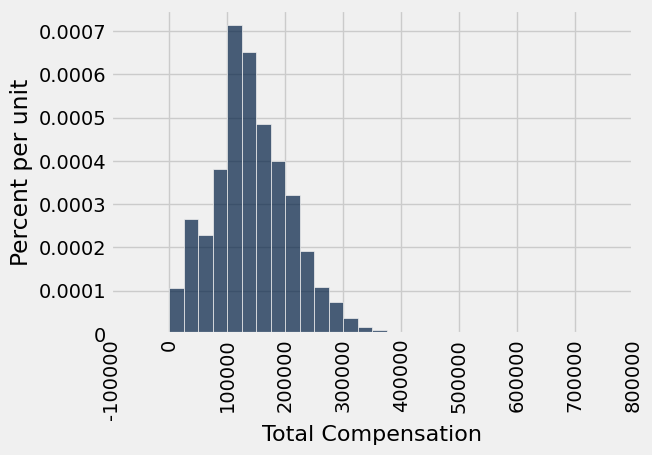

In [20]:
sf_bins=np.arange(0,726000,25000)
sf.hist('Total Compensation',bins=sf_bins)

## Parameter: Median Total Compensation

In [21]:
#50th percentile value of the dataset stored in the column , Total Compensation
pop_median=percentile(50,sf.column('Total Compensation'))
pop_median

135747.0

## Estimating the Parameter(Pretend it is unknown)

In [22]:
#we randomnly sample 400 people and ask them their total compensation
our_sample=sf.sample(400,with_replacement=False)

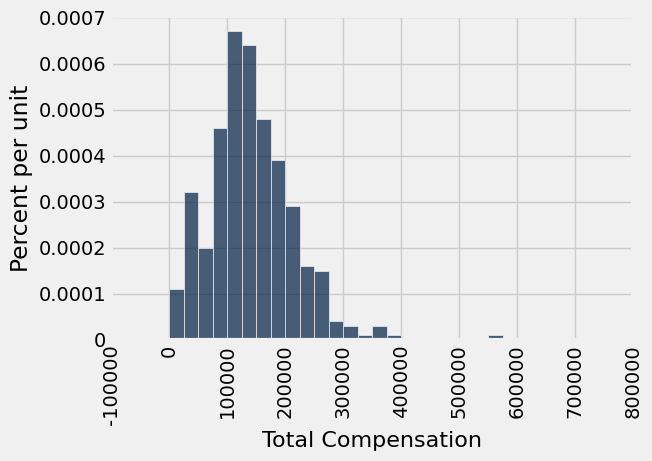

In [23]:
our_sample.hist('Total Compensation',bins=sf_bins)

In [24]:
percentile(50,our_sample.column('Total Compensation'))

132931.0

## Bootstrap
sample randomnly
from the original sample with replacement the same number of times as original sample

In [25]:
bootstrap_sample=our_sample.sample()

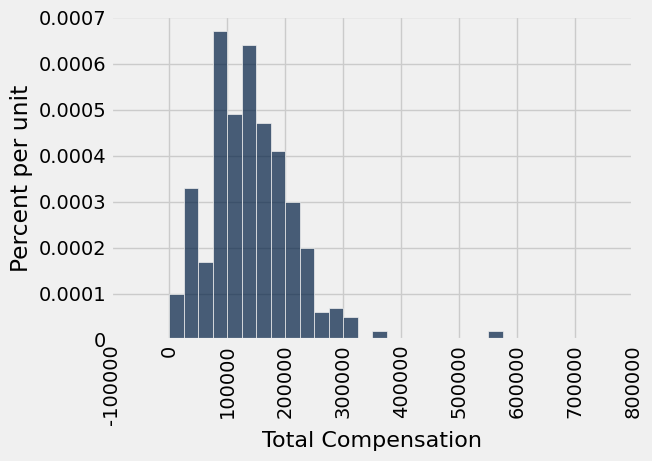

In [26]:
bootstrap_sample.hist('Total Compensation',bins=sf_bins)

## Bootstrap Sample Median  
This is one estimate of the population median

In [27]:
percentile(50,bootstrap_sample.column('Total Compensation'))

134709.0

In [28]:
def one_bootstrap_median():
    #draw the bootstrap sample
    resample = our_sample.sample()
    #return the median total compensation in the bootstrap sample
    return percentile(50,resample.column('Total Compensation'))

In [29]:
one_bootstrap_median()

135195.0

In [30]:
# generate the medians of 1000 bootstrap samples
num_repeatitions=1000
bstrap_medians=make_array()
for i in np.arange(num_repeatitions):
    bstrap_medians=np.append(bstrap_medians,one_bootstrap_median())

In [31]:
resampled_medians=Table().with_column('Bootstrap Sample Median',bstrap_medians)
resampled_medians

Bootstrap Sample Median
134288
132329
134385
131513
134385
131490
132931
127008
139074
137434


Text(0.5, 1.0, 'Bootstrap Medians and the Parameter (Green Dot)')

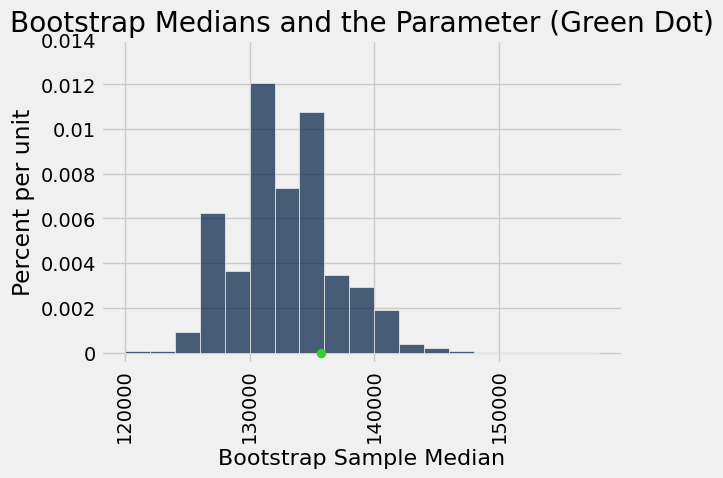

In [32]:
median_bins=np.arange(120000,160000,2000)
resampled_medians.hist(bins=median_bins)

#plotting parameters ,ignore this code
parameter_green='#32CD32'
plots.ylim(-0.000005,0.00014)
plots.scatter(pop_median,0,color=parameter_green,s=40,zorder=2)
plots.title('Bootstrap Medians and the Parameter (Green Dot)')

## Percentile Methods : Middle 95% of the Bootstrap estimates

In [33]:
left = percentile(2.5,bstrap_medians)
right=percentile(97.5,bstrap_medians)
make_array(left,right)

array([ 126244.,  141352.])

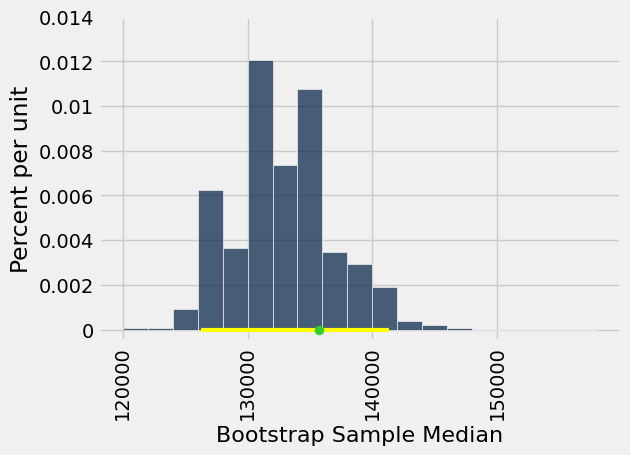

In [34]:
resampled_medians.hist(bins=median_bins)

#plotting parameter
plots.ylim(-0.000005,0.00014)
plots.plot(make_array(left,right),make_array(0,0),color='yellow',lw=3,zorder=1)
plots.scatter(pop_median,0,color=parameter_green,s=40,zorder=2)